<a href="https://colab.research.google.com/github/yossy-goddog/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('画像を編集して表示するプログラムを作る')

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2023-12-28 06:33:16--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 173.194.202.139, 173.194.202.138, 173.194.202.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.202.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/97jh4db5t245tv52lr8r8dpbu1mer15j/1703745150000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=360e5a9b-4bfa-4e77-8afa-4ef868b32e0b [following]
--2023-12-28 06:33:17--  https://doc-04-0o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/97jh4db5t245tv52lr8r8dpbu1mer15j/1703745150000/05465361039627264646/*/1hsUauww6HMD9YMejBh72as9x9wNCWeBc?e=download&uuid=360e5a9b-4bfa-4e77-8afa-4ef868b32e0b
Resolving doc-04-0o-docs.googleusercontent.com (doc-04-0o-docs.googleusercontent.com)... 142.250.99.132, 2

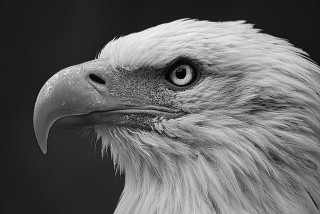

x方向にエッジ検出


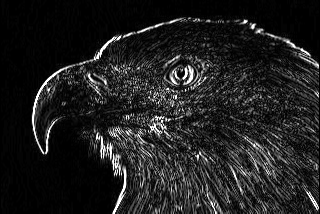

y方向にエッジ検出


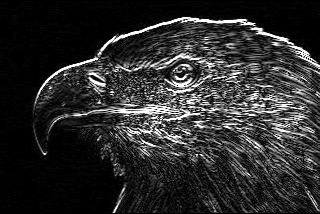

x,y方向にエッジ検出


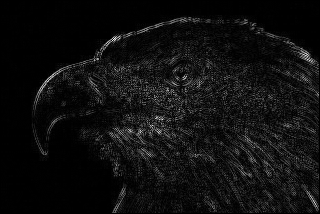

色ごとの一致度を確認する


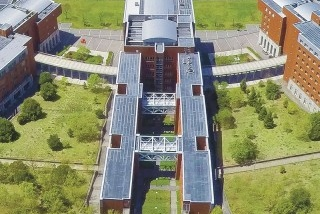

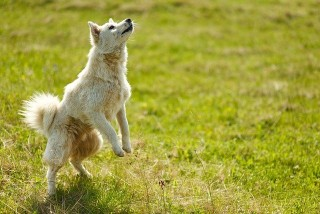

青色の一致度: 0.5113103272380036
緑色の一致度: 0.8863056247857646
赤色の一致度: 0.8592225387986774


In [ ]:
import cv2
from google.colab import files
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import sys



# 画像を読み込む
img_color=cv2.imread('eagle.jpg')
if img_color is None:
  sys.exit('エラー：ファイルを開けません')
img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
# ソーベルフィルタ（x方向に微分）
sobel_x_img=cv2.Sobel(img,         # 入力画像
                        cv2.CV_32F,  # ビット深度
                        1,           # x方向に微分
                        0,           # y方向に微分
                        ksize=3      # カーネルサイズ(3 x 3)
                       )

# 微分した際のマイナス値を絶対値に変換
sobel_x_img=cv2.convertScaleAbs(sobel_x_img)
# ソーベルフィルタ（y方向に微分）
sobel_y_img=cv2.Sobel(img,         # 入力画像
                        cv2.CV_32F,  # ビット深度
                        0,           # x方向に微分
                        1,           # y方向に微分
                        ksize=3      # カーネルサイズ(3 x 3)
                       )

# 微分した際のマイナス値を絶対値に変換
sobel_y_img=cv2.convertScaleAbs(sobel_y_img)
# ソーベルフィルタ（x,y方向に微分）
sobel_multi_img=cv2.Sobel(img,         # 入力画像
                            cv2.CV_32F,  # ビット深度
                            1,           # x方向に微分
                            1,           # y方向に微分
                            ksize=3      # カーネルサイズ(3 x 3)
                        )

# 微分した際のマイナス値を絶対値に変換
sobel_multi_img=cv2.convertScaleAbs(sobel_multi_img)
# 表示・比較
cv2_imshow(img)                   # オリジナル画像
print('x方向にエッジ検出')
cv2_imshow(sobel_x_img)   # エッジ検出（x方向微分）
print('y方向にエッジ検出')
cv2_imshow(sobel_y_img)
print('x,y方向にエッジ検出')
cv2_imshow(sobel_multi_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#画像の一致度を確認
print('色ごとの一致度を確認する')
image1=cv2.imread('ichidai.jpg',3)
image2=cv2.imread('dog.jpg',3)
cv2_imshow(image1)
cv2_imshow(image2)
# 画像をヒストグラム化する(青)
image1_hist_blue=cv2.calcHist([image1], [0], None, [256], [0, 256])
image2_hist_blue=cv2.calcHist([image2], [0], None, [256], [0, 256])
# 画像をヒストグラム化する(緑)
image1_hist_green=cv2.calcHist([image1], [1], None, [256], [0, 256])
image2_hist_green=cv2.calcHist([image2], [1], None, [256], [0, 256])
# 画像をヒストグラム化する(赤)
image1_hist_red=cv2.calcHist([image1], [2], None, [256], [0, 256])
image2_hist_red=cv2.calcHist([image2], [2], None, [256], [0, 256])
# ヒストグラムした画像を比較
print(f'青色の一致度: {cv2.compareHist(image1_hist_blue, image2_hist_blue, method=cv2.HISTCMP_CORREL)}')
print(f'緑色の一致度: {cv2.compareHist(image1_hist_green, image2_hist_green, method=cv2.HISTCMP_CORREL)}')
print(f'赤色の一致度: {cv2.compareHist(image1_hist_red, image2_hist_red, method=cv2.HISTCMP_CORREL)}')